In [1]:
import pandas as pd
import sqlite3
import numpy as np
from matplotlib.pyplot import figure

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
conTXs = sqlite3.connect('../../../../../../datasets/nfts.sqlite')

In [3]:
transfers = pd.read_sql_query("SELECT * FROM transfers", conTXs)

In [4]:
num_df = (transfers[["transaction_value", "timestamp"]].apply(pd.to_numeric, errors='coerce'))
num_df["timestamp"] = pd.to_datetime(num_df.timestamp, unit='s', errors='coerce')
num_df.set_index("timestamp")
num_df = num_df.resample("1440min", label='right', on='timestamp').sum()


Text(0.5, 1.0, 'NFT transfers value over time')

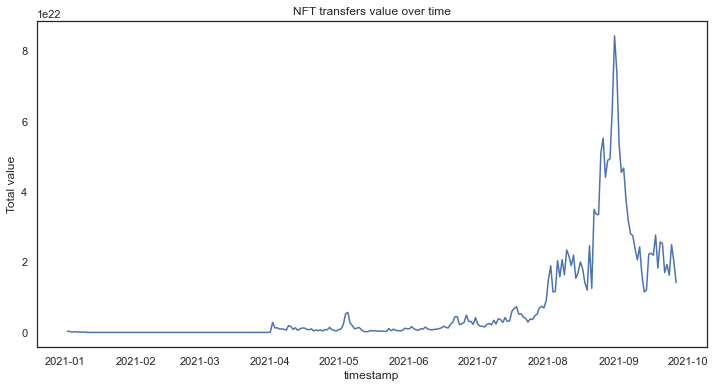

In [5]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))
# Line chart showing the number of visitors to each museum over time
ax = sns.lineplot(data=num_df, x="timestamp", y="transaction_value")
ax.set(xlabel='timestamp', ylabel='Total value')
plt.title("NFT transfers value over time")
# Add title

In [6]:
print("number of unique addresses:", transfers["nft_address"].nunique())

number of unique addresses: 6765


In [7]:
# num_df = (transfers[["nft_address", "transaction_value", "timestamp"]

In [8]:
#create data frame where group together from_addresses and count size of each group (how many TX each address did in total)
from_series = transfers["from_address"].groupby(transfers["from_address"]).size()
#create data frame where group together from_addresses and count size of each group (how many TX each address did in total)
to_series = transfers["to_address"].groupby(transfers["to_address"]).size()

In [9]:
df = pd.DataFrame()
df = df.join(to_series.rename("to_count"), how='outer')
df = df.join(from_series.rename('from_count'), how='outer')

<Figure size 1728x1728 with 0 Axes>

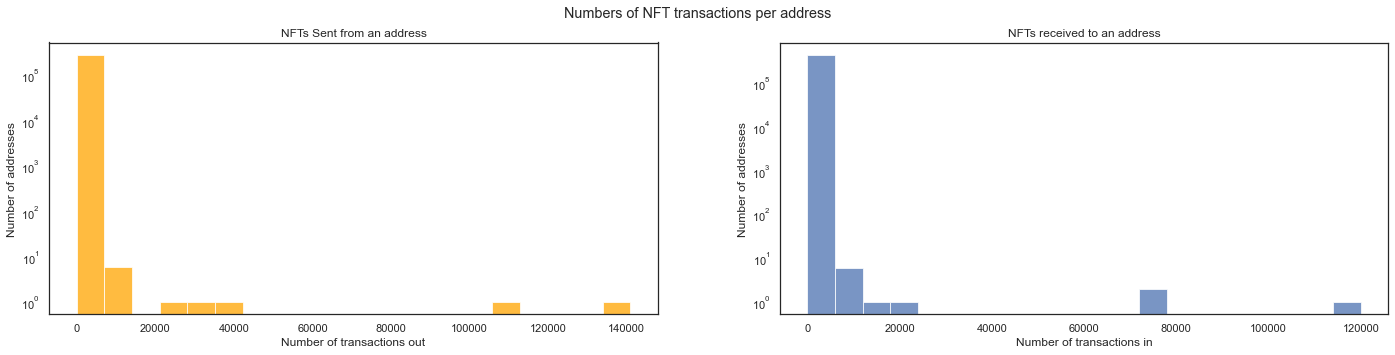

In [10]:
plt.figure(figsize=(24,24))
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(24, 5, forward=True)
fig.suptitle('Numbers of NFT transactions per address')
axs[0].hist(df["from_count"], density=False, alpha=0.75, log=True, bins=20, color='orange')
axs[0].set_title("NFTs Sent from an address")
axs[1].hist(df["to_count"], density=False, alpha=0.75, log=True, bins=20)
axs[1].set_title("NFTs received to an address")
plt.setp(axs[0], xlabel='Number of transactions out', ylabel='Number of addresses')
plt.setp(axs[1], xlabel='Number of transactions in', ylabel='Number of addresses')
print("")

In [11]:
df_small=df[df["to_count"]<10]
df_small=df_small[df_small["from_count"]<10]

<Figure size 1728x1728 with 0 Axes>

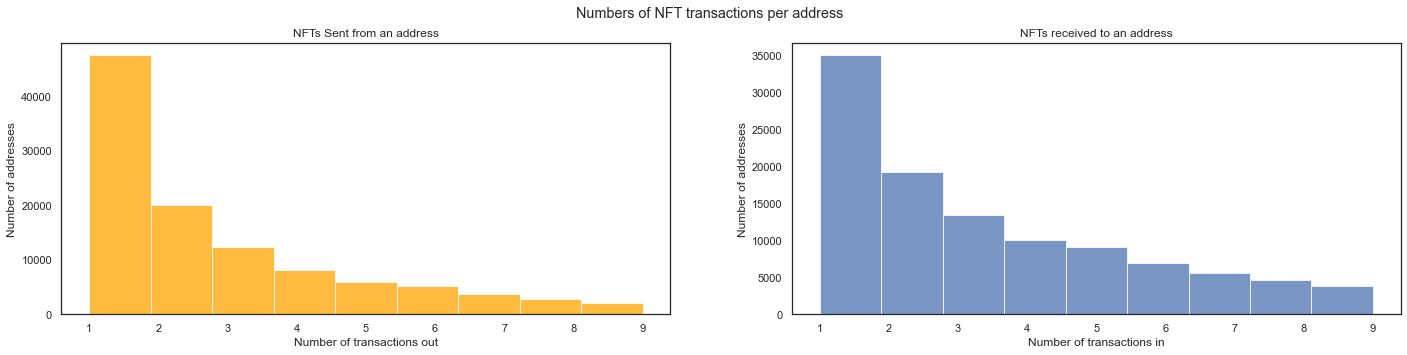

In [12]:
plt.figure(figsize=(24,24))
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(24, 5, forward=True)
fig.suptitle('Numbers of NFT transactions per address')
axs[0].hist(df_small["from_count"], density=False, alpha=0.75, log=False, bins=9, color='orange')
axs[0].set_title("NFTs Sent from an address")
axs[1].hist(df_small["to_count"], density=False, alpha=0.75, log=False, bins=9)
axs[1].set_title("NFTs received to an address")
plt.setp(axs[0], xlabel='Number of transactions out', ylabel='Number of addresses')
plt.setp(axs[1], xlabel='Number of transactions in', ylabel='Number of addresses')
print("")

In [13]:
whales_tx=df[df["from_count"]>60000]
whales_rx=df[df["to_count"]>60000]

In [14]:
whales_rx

,to_count,from_count
0x0000000000000000000000000000000000000000,119978.0,NaN
0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,74608.0,1.0
0xcDA72070E455bb31C7690a170224Ce43623d0B6f,76645.0,36116.0


### Whales RX info:
0x0000000000000000000000000000000000000000 - burn address

[0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa](https://etherscan.io/address/0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa) / [creator](https://etherscan.io/address/0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa) / info: `ENS: ETH Registrar Controller `

[0xcDA72070E455bb31C7690a170224Ce43623d0B6f](https://etherscan.io/address/0xcDA72070E455bb31C7690a170224Ce43623d0B6f) / [creator](https://etherscan.io/address/0x95271d54d6e0d88b3825f89a766f97b8b7e8af82) / info: https://foundation.app

In [15]:
whales_tx

,to_count,from_count
0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,2.0,140875.0
0x327305A797d92a39cEe1a225D7E2A1cC42B1a8fA,NaN,106620.0


### Whales TX info:

[0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5](https://etherscan.io/address/0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5) / [creator](https://etherscan.io/address/0x4fe4e666be5752f1fdd210f4ab5de2cc26e3e0e8) / info: `ENS: ETH Registrar Controller`

[0x327305A797d92a39cEe1a225D7E2A1cC42B1a8fA](https://etherscan.io/address/0x327305A797d92a39cEe1a225D7E2A1cC42B1a8fA) not a contract! / info: `???`

<Figure size 1728x1728 with 0 Axes>

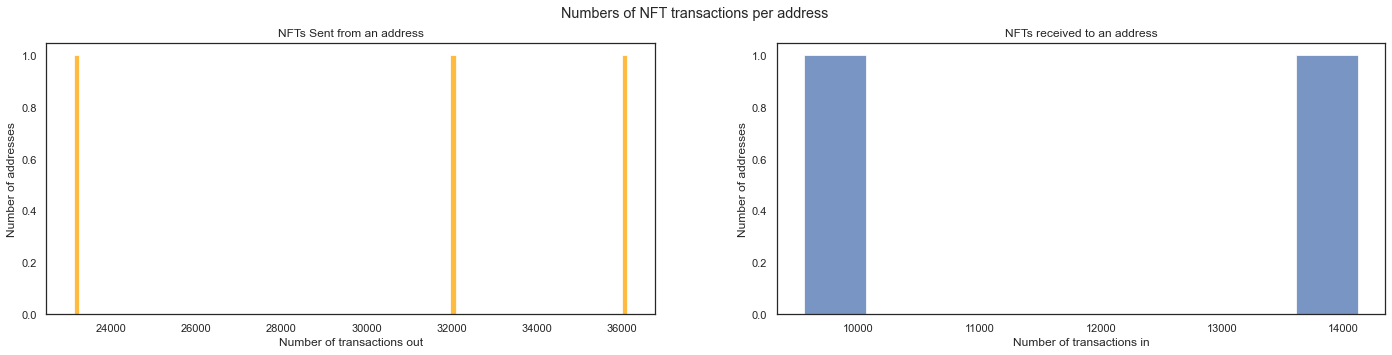

In [16]:
sharks_tx=df[df["from_count"]>20e3]
sharks_rx=df[df["to_count"]>20e3]
sharks_tx=sharks_tx[sharks_tx["from_count"]<60e3]
sharks_rx=sharks_tx[sharks_tx["to_count"]<60e3]

plt.figure(figsize=(24,24))
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(24, 5, forward=True)
fig.suptitle('Numbers of NFT transactions per address')
axs[0].hist(sharks_tx["from_count"], density=False, alpha=0.75, log=False, bins=100, color='orange')
axs[0].set_title("NFTs Sent from an address")
axs[1].hist(sharks_rx["to_count"], density=False, alpha=0.75, log=False, bins=9)
axs[1].set_title("NFTs received to an address")
plt.setp(axs[0], xlabel='Number of transactions out', ylabel='Number of addresses')
plt.setp(axs[1], xlabel='Number of transactions in', ylabel='Number of addresses')
print("")

In [17]:
sharks_tx

,to_count,from_count
0xE052113bd7D7700d623414a0a4585BCaE754E9d5,9552.0,31967.0
0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C,14124.0,23128.0
0xcDA72070E455bb31C7690a170224Ce43623d0B6f,76645.0,36116.0


### Sharks TX info:

[0xE052113bd7D7700d623414a0a4585BCaE754E9d5](https://etherscan.io/address/0xE052113bd7D7700d623414a0a4585BCaE754E9d5) /  not a contract! / info: `Nifty Gateway: Omnibus `

[0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C](https://etherscan.io/address/0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C) /  not a contract! / info: `CryptoKitties: Sales Auction `

[0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C](https://etherscan.io/address/0xcDA72070E455bb31C7690a170224Ce43623d0B6f) /  [creator](https://etherscan.io/address/0x95271d54d6e0d88b3825f89a766f97b8b7e8af82) / info: https://foundation.app

In [18]:
sharks_rx

,to_count,from_count
0xE052113bd7D7700d623414a0a4585BCaE754E9d5,9552.0,31967.0
0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C,14124.0,23128.0


### Sharks RX info:

[0xE052113bd7D7700d623414a0a4585BCaE754E9d5](https://etherscan.io/address/0xE052113bd7D7700d623414a0a4585BCaE754E9d5) /  not a contract! / info: `Nifty Gateway: Omnibus `

[0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C](https://etherscan.io/address/0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C) /  not a contract! / info: `CryptoKitties: Sales Auction `


In [19]:
#transfers not transactions
transactions_per_nft = transfers["nft_address"].groupby(transfers["nft_address"]).size()


In [20]:
transfers["transaction_value"] = pd.to_numeric(transfers["transaction_value"])
transfers["transaction_value"] = transfers["transaction_value"].fillna(0)
transfers["transaction_value"].head(15)

0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
5     6.180000e+18
6     0.000000e+00
7     0.000000e+00
8     3.000000e+16
9     0.000000e+00
10    0.000000e+00
11    0.000000e+00
12    0.000000e+00
13    0.000000e+00
14    0.000000e+00
Name: transaction_value, dtype: float64

In [21]:
total_value_per_nft = transfers[["nft_address", "transaction_value"]].groupby(transfers["nft_address"]).sum()
total_value_per_nft.head(8)

,transaction_value
nft_address,
0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0.000000e+00
0x000000000437b3CCE2530936156388Bff5578FC3,4.175880e+18
0x000000000A42C2791eEc307FFf43Fa5c640e3Ef7,0.000000e+00
0x000000F36EDb9d436Be73cDBf0DCa7dF3E6F3A50,0.000000e+00
0x00000633Df1228868270bAdB2B812E12e13fdB91,2.829000e+17
0x000E49C87d2874431567d38FF9548890aB39BAac,1.399971e+19
0x001B4b85192aa034bff1524f181e3a7060e0dC30,1.800000e+17
0x0025Eae58dF9F636F261CFdFa98cAcb57779DF74,0.000000e+00


In [73]:
most_valuable_nfts = total_value_per_nft["transaction_value"].sort_values(ascending=False).head(8)
most_valuable_nfts = most_valuable_nfts.to_frame()
most_valuable_nfts['info'] = None
most_valuable_nfts

,transaction_value,info
nft_address,,
0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270,2.296429e+23,None
0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,1.588150e+23,None
0x60E4d786628Fea6478F785A6d7e704777c86a7c6,7.530649e+22,None
0x7Bd29408f11D2bFC23c34f18275bBf23bB716Bc7,6.610220e+22,None
0xFF9C1b15B16263C61d017ee9F65C50e4AE0113D7,6.378142e+22,None
0x3bf2922f4520a8BA0c2eFC3D2a1539678DaD5e9D,4.022007e+22,None
0x059EDD72Cd353dF5106D2B9cC5ab83a52287aC3a,3.809675e+22,None
0xBd3531dA5CF5857e7CfAA92426877b022e612cf8,3.797948e+22,None


### INFO:
[0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270](https://etherscan.io/address/0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270) Info: https://artblocks.io

[0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D](https://etherscan.io/address/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D) Info: https://boredapeyachtclub.com/#/

[0x60E4d786628Fea6478F785A6d7e704777c86a7c6](https://etherscan.io/address/0x60E4d786628Fea6478F785A6d7e704777c86a7c6) Info: https://boredapeyachtclub.com/#/mayc

[0x7Bd29408f11D2bFC23c34f18275bBf23bB716Bc7](https://etherscan.io/address/0x7Bd29408f11D2bFC23c34f18275bBf23bB716Bc7) Info: https://larvalabs.com/project/meebits

[0xFF9C1b15B16263C61d017ee9F65C50e4AE0113D7](https://etherscan.io/address/0xFF9C1b15B16263C61d017ee9F65C50e4AE0113D7) Info: https://www.lootproject.com

[0x3bf2922f4520a8BA0c2eFC3D2a1539678DaD5e9D](https://etherscan.io/address/0x3bf2922f4520a8BA0c2eFC3D2a1539678DaD5e9D) Info: https://www.0n1force.com

[0x059EDD72Cd353dF5106D2B9cC5ab83a52287aC3a](https://etherscan.io/address/0x059EDD72Cd353dF5106D2B9cC5ab83a52287aC3a) Info: https://artblocks.io  Old BLOCKS Token 

[0xBd3531dA5CF5857e7CfAA92426877b022e612cf8](https://etherscan.io/address/0xBd3531dA5CF5857e7CfAA92426877b022e612cf8) Info: https://www.pudgypenguins.io/#/

In [153]:
most_valuable_nfts.at['0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270', 'info'] = 'artblocks'
most_valuable_nfts.at['0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D', 'info'] = 'BAYC Token'
most_valuable_nfts.at['0x60E4d786628Fea6478F785A6d7e704777c86a7c6', 'info'] = 'MAYC Token'
most_valuable_nfts.at['0x7Bd29408f11D2bFC23c34f18275bBf23bB716Bc7', 'info'] = 'Meebits'
most_valuable_nfts.at['0xFF9C1b15B16263C61d017ee9F65C50e4AE0113D7', 'info'] = 'LOOT'
most_valuable_nfts.at['0x3bf2922f4520a8BA0c2eFC3D2a1539678DaD5e9D', 'info'] = '0n1force'
most_valuable_nfts.at['0x059EDD72Cd353dF5106D2B9cC5ab83a52287aC3a', 'info'] = 'Artblocks OLD'
most_valuable_nfts.at['0xBd3531dA5CF5857e7CfAA92426877b022e612cf8', 'info'] = 'pudgypenguins'
most_valuable_nfts

,transaction_value,info
nft_address,,
0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270,2.296429e+23,artblocks
0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,1.588150e+23,BAYC Token
0x60E4d786628Fea6478F785A6d7e704777c86a7c6,7.530649e+22,MAYC Token
0x7Bd29408f11D2bFC23c34f18275bBf23bB716Bc7,6.610220e+22,Meebits
0xFF9C1b15B16263C61d017ee9F65C50e4AE0113D7,6.378142e+22,LOOT
0x3bf2922f4520a8BA0c2eFC3D2a1539678DaD5e9D,4.022007e+22,0n1force
0x059EDD72Cd353dF5106D2B9cC5ab83a52287aC3a,3.809675e+22,Artblocks OLD
0xBd3531dA5CF5857e7CfAA92426877b022e612cf8,3.797948e+22,pudgypenguins


Text(0.5, 1.0, 'Most valuable NFT conctract chart')

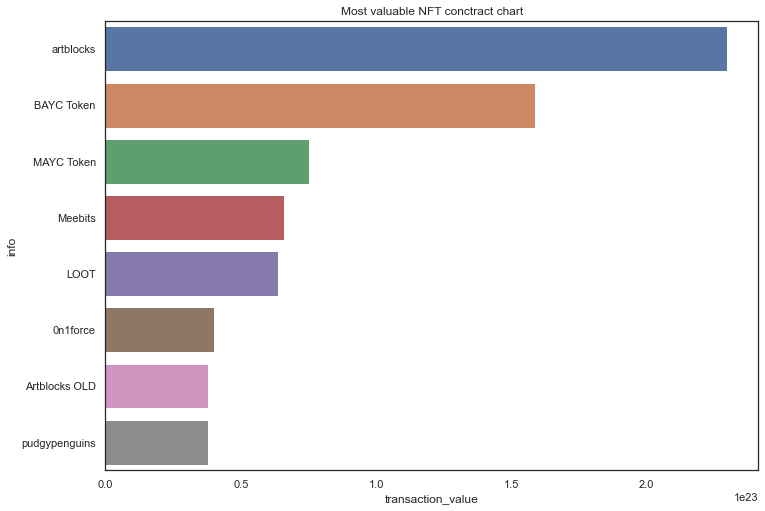

In [154]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(y=most_valuable_nfts['info'], x=most_valuable_nfts['transaction_value']).set_title('Most valuable NFT conctract chart')

In [155]:
#get frame with values over time
num_df = pd.DataFrame()
#cast to numeric
num_df = (transfers[["transaction_value", "timestamp"]].apply(pd.to_numeric, errors='coerce'))
#add nft_address column to it
num_df["nft_address"]=transfers["nft_address"]
#filter out only ones that are in most_popular_nft variable
num_df = num_df[num_df.nft_address.isin(list(most_valuable_nfts.index))]
#convert timestamp in to date time
num_df["timestamp"] = pd.to_datetime(num_df.timestamp, unit='s', errors='coerce')
#set index as timestamp
num_df = num_df.set_index("timestamp")

num_df['info'] = None
for i in range(len(most_valuable_nfts)):
    address = most_valuable_nfts.iloc[i].name
    
    num_df.loc[num_df.nft_address == address, 'info'] = most_valuable_nfts.at[address, 'info'] #most_valuable_nfts.at[num_df.iloc[i]['nft_address'], 'info']

num_df

,transaction_value,nft_address,info
timestamp,,,
2021-01-01 01:10:00,1.761902e+17,0x059EDD72Cd353dF5106D2B9cC5ab83a52287aC3a,Artblocks OLD
2021-01-01 01:10:00,1.761902e+17,0x059EDD72Cd353dF5106D2B9cC5ab83a52287aC3a,Artblocks OLD
2021-01-01 01:10:00,1.761902e+17,0x059EDD72Cd353dF5106D2B9cC5ab83a52287aC3a,Artblocks OLD
2021-01-01 01:10:00,1.761902e+17,0x059EDD72Cd353dF5106D2B9cC5ab83a52287aC3a,Artblocks OLD
2021-01-01 01:10:00,1.761902e+17,0x059EDD72Cd353dF5106D2B9cC5ab83a52287aC3a,Artblocks OLD
...,...,...,...
2021-05-31 23:55:02,1.110000e+18,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,BAYC Token
2021-05-31 23:55:34,8.000000e+17,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,BAYC Token
2021-05-31 23:57:10,1.000000e+18,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,BAYC Token


In [156]:
#group timestamps by day, create column per each nft_address, aggregate transaction value by count and sum
new_df = num_df.groupby([pd.Grouper(freq='d'), 'nft_address', 'info'])['transaction_value'].agg(transaction_value="sum")


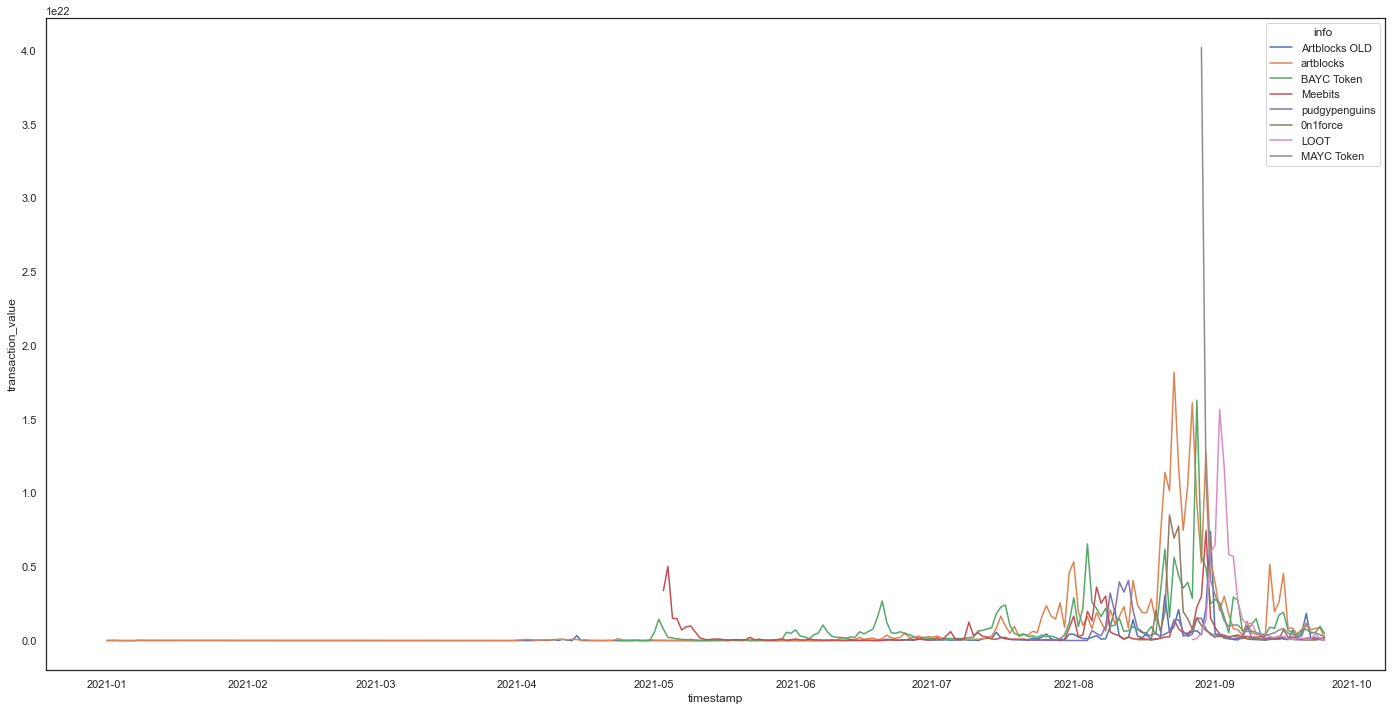

In [157]:
plt.figure(figsize=(24, 12))
# new_df.unstack()
ax = sns.lineplot(data=new_df, x='timestamp', y='transaction_value', hue='info',)

In [158]:
most_popular_nfts

nft_address
0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205    386096
0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85    187809
0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270    135308
0x3B3ee1931Dc30C1957379FAc9aba94D1C48a5405    128240
0x06012c8cf97BEaD5deAe237070F9587f8E7A266d     70095
0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D     34966
0x1A92f7381B9F03921564a437210bB9396471050C     29539
0xBd3531dA5CF5857e7CfAA92426877b022e612cf8     28764
Name: nft_address, dtype: int64

### INFO:
[0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205](https://etherscan.io/address/0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205) Info: SOR token

[0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85](https://etherscan.io/address/0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85) Info: ENS Base registrar

[0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270](https://etherscan.io/address/0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270) Info: BLOCKS Token

[0x3B3ee1931Dc30C1957379FAc9aba94D1C48a5405](https://etherscan.io/address/0x3B3ee1931Dc30C1957379FAc9aba94D1C48a5405) Info: FNDNFT Token

[0x06012c8cf97BEaD5deAe237070F9587f8E7A266d](https://etherscan.io/address/0x06012c8cf97BEaD5deAe237070F9587f8E7A266d) Info: CryptoKitties Core

[0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D](https://etherscan.io/address/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D) Info: BAYC Token

[0x1A92f7381B9F03921564a437210bB9396471050C](https://etherscan.io/address/0x1A92f7381B9F03921564a437210bB9396471050C) Info: COOL Token

[0xBd3531dA5CF5857e7CfAA92426877b022e612cf8](https://etherscan.io/address/0xBd3531dA5CF5857e7CfAA92426877b022e612cf8) Info: PPG Token

In [170]:
most_popular_nfts = transactions_per_nft.sort_values(ascending=False).head(8)
most_popular_nfts = most_popular_nfts.to_frame()
most_valuable_nfts['info'] = None
most_popular_nfts.at['0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205', 'info'] = 'SOR token'
most_popular_nfts.at['0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85', 'info'] = 'ENS Base registrar'
most_popular_nfts.at['0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270', 'info'] = 'BLOCKS Token'
most_popular_nfts.at['0x3B3ee1931Dc30C1957379FAc9aba94D1C48a5405', 'info'] = 'FNDNFT Token'
most_popular_nfts.at['0x06012c8cf97BEaD5deAe237070F9587f8E7A266d', 'info'] = 'CryptoKitties Core'
most_popular_nfts.at['0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D', 'info'] = 'BAYC Token'
most_popular_nfts.at['0x1A92f7381B9F03921564a437210bB9396471050C', 'info'] = ' COOL Token'
most_popular_nfts.at['0xBd3531dA5CF5857e7CfAA92426877b022e612cf8', 'info'] = 'PPG Token'
most_popular_nfts = most_popular_nfts.rename(columns={'nft_address': 'count'})
most_popular_nfts

,count,info
nft_address,,
0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,386096,SOR token
0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85,187809,ENS Base registrar
0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270,135308,BLOCKS Token
0x3B3ee1931Dc30C1957379FAc9aba94D1C48a5405,128240,FNDNFT Token
0x06012c8cf97BEaD5deAe237070F9587f8E7A266d,70095,CryptoKitties Core
0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,34966,BAYC Token
0x1A92f7381B9F03921564a437210bB9396471050C,29539,COOL Token
0xBd3531dA5CF5857e7CfAA92426877b022e612cf8,28764,PPG Token


Text(0.5, 1.0, 'Most transaction count per NFT conctract chart')

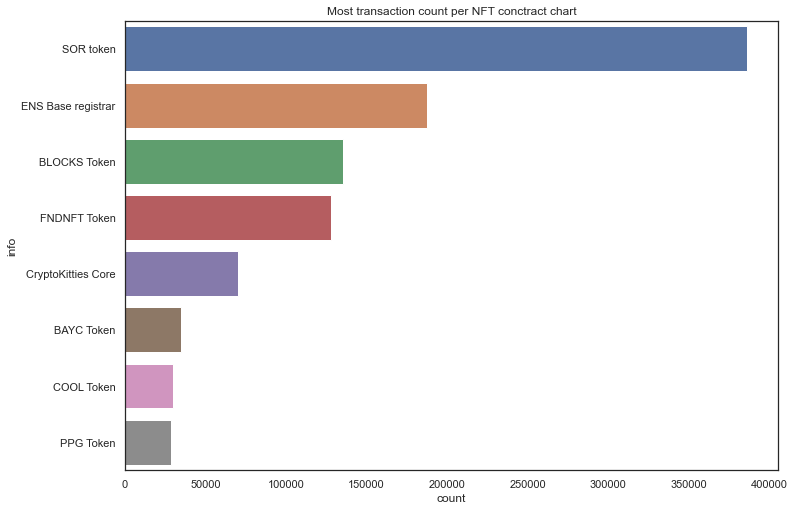

In [175]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(y=most_popular_nfts['info'], x=most_popular_nfts['count']).set_title('Most transaction count per NFT conctract chart')

In [176]:
#get frame with values over time
num_df = pd.DataFrame()
#cast to numeric
num_df = (transfers[["transaction_value", "timestamp"]].apply(pd.to_numeric, errors='coerce'))
#add nft_address column to it
num_df["nft_address"]=transfers["nft_address"]
#filter out only ones that are in most_popular_nfts variable
num_df = num_df[num_df.nft_address.isin(list(most_popular_nfts.index))]
#convert timestamp in to date time
num_df["timestamp"] = pd.to_datetime(num_df.timestamp, unit='s', errors='coerce')
#set index as timestamp
num_df = num_df.set_index("timestamp")

num_df['info'] = None
for i in range(len(most_valuable_nfts)):
    address = most_popular_nfts.iloc[i].name
    
    num_df.loc[num_df.nft_address == address, 'info'] = most_popular_nfts.at[address, 'info'] #most_valuable_nfts.at[num_df.iloc[i]['nft_address'], 'info']

num_df

,transaction_value,nft_address,info
timestamp,,,
2021-01-01 00:16:46,0.000000e+00,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,SOR token
2021-01-01 00:16:46,0.000000e+00,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,SOR token
2021-01-01 00:01:37,0.000000e+00,0x06012c8cf97BEaD5deAe237070F9587f8E7A266d,CryptoKitties Core
2021-01-01 00:19:08,3.000000e+16,0x06012c8cf97BEaD5deAe237070F9587f8E7A266d,CryptoKitties Core
2021-01-01 00:16:46,0.000000e+00,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,SOR token
...,...,...,...
2021-05-31 23:57:10,0.000000e+00,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,BAYC Token
2021-05-31 23:57:26,0.000000e+00,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,SOR token
2021-05-31 23:57:26,0.000000e+00,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,SOR token


In [179]:
#group timestamps by day, create column per each nft_address, aggregate transaction value by count and sum
new_df = num_df.groupby([pd.Grouper(freq='d'), 'nft_address', 'info'])['transaction_value'].agg(transaction_value="count").rename(columns={'transaction_value': 'count'})


In [180]:
new_df

count
timestamp  nft_address                                info                     
2021-01-01 0x06012c8cf97BEaD5deAe237070F9587f8E7A266d CryptoKitties Core    179
           0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85 ENS Base registrar    166
           0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205 SOR token             831
           0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270 BLOCKS Token           39
2021-01-02 0x06012c8cf97BEaD5deAe237070F9587f8E7A266d CryptoKitties Core    168
...                                                                         ...
2021-09-25 0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85 ENS Base registrar   1965
           0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205 SOR token             286
           0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D BAYC Token             75
           0xBd3531dA5CF5857e7CfAA92426877b022e612cf8 PPG Token              38
           0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270 BLOCKS Token          505

[1240 rows x 1 columns]

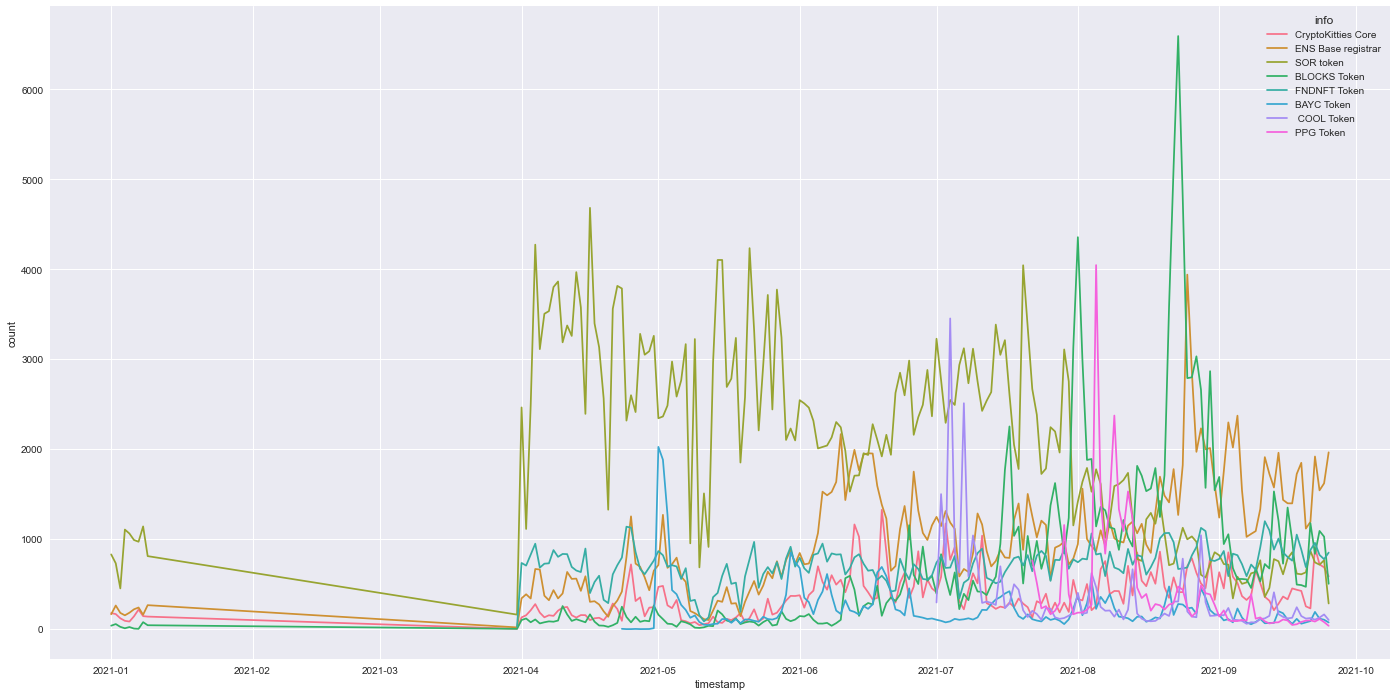

In [190]:
plt.figure(figsize=(24, 12))
# new_df.unstack()
ax = sns.lineplot(data=new_df, x='timestamp', y='count', hue='info')

# ax.set(yscale="log")